In [1]:
import tkinter as tk
from PIL import Image, ImageTk
import time

class Interfaz:
    def __init__(self, root):
        self.root = root
        self.root.title("Interfaz Cambiante")
        self.root.geometry("300x300")  # Establece el tamaño de la ventana
        
        self.label = tk.Label(root)
        self.label.pack(pady=20)
        
        self.actualizar_interfaz()

    def actualizar_interfaz(self):
        # Carga las imágenes
        image = Image.open("image3_1.png")
        image2 = Image.open("image3_2.png")
        
        # Convierte las imágenes para ser mostradas en tkinter
        image_tk = ImageTk.PhotoImage(image)
        image2_tk = ImageTk.PhotoImage(image2)
        
        # Define una lista de imágenes para mostrar
        imagenes = [image_tk, image2_tk]
        
        # Muestra una imagen diferente cada segundo
        for img in imagenes:
            self.label.config(image=img)
            self.root.update()
            time.sleep(1)

# Crea la ventana principal
root = tk.Tk()
app = Interfaz(root)

# Ejecuta la aplicación
root.mainloop()


In [2]:
import numpy as np
import cv2

# Crear una imagen blanca
height, width = 100, 200
image = np.ones((height, width, 3), dtype=np.uint8) * 255  # Fondo blanco

# Dibujar la cabeza del gato (naranja)
cv2.ellipse(image, (70, 50), (30, 20), 0, 0, 360, (255, 165, 0), -1)  # Color naranja (BGR)

# Dibujar los ojos (negro)
cv2.circle(image, (55, 45), 5, (0, 0, 0), -1)  # Color negro (BGR)
cv2.circle(image, (85, 45), 5, (0, 0, 0), -1)  # Color negro (BGR)

# Dibujar la nariz (negro)
cv2.ellipse(image, (70, 55), (5, 3), 0, 0, 360, (0, 0, 0), -1)  # Color negro (BGR)

# Dibujar las orejas (naranja)
ear_left = np.array([[50, 30], [60, 20], [70, 30]])
ear_right = np.array([[90, 30], [80, 20], [70, 30]])
cv2.fillPoly(image, [ear_left], (255, 165, 0))  # Color naranja (BGR)
cv2.fillPoly(image, [ear_right], (255, 165, 0))  # Color naranja (BGR)

# Mostrar la imagen
# cv2.imshow('Gato', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(image)
plt.show()

print("- Dimensiones de la imagen:")
print(image.shape)


NameError: name 'plt' is not defined

In [ ]:
# Pruebas proyecto

In [136]:
import random

# Función para generar un color aleatorio en el rango RGB
def generate_random_color():
    return [random.randint(0, 255) for _ in range(3)]

# Ejemplo de generación de un color aleatorio
random_color = generate_random_color()
print("Color aleatorio generado:", random_color)


Color aleatorio generado: [94, 69, 211]


In [137]:
import math

# Función para calcular la distancia euclidiana entre dos colores en el espacio RGB
def euclidean_distance(color1, color2):
    return math.sqrt(sum((c1 - c2) ** 2 for c1, c2 in zip(color1, color2)))

# Ejemplo de cálculo de la distancia entre dos colores
white = [255, 255, 255]
blue = [0, 0, 255]
distance = euclidean_distance(white, blue)
print("Distancia entre blanco y azul:", distance)

Distancia entre blanco y azul: 360.62445840513925


In [150]:
# Función para generar una población inicial de colores aleatorios
def generate_initial_population(population_size):
    return [generate_random_color() for _ in range(population_size)]

# Ejemplo de generación de una población inicial
population_size = 10
initial_population = generate_initial_population(population_size)
print("Población inicial generada:", initial_population)

Población inicial generada: [[180, 34, 238], [196, 38, 59], [115, 159, 232], [253, 185, 139], [250, 24, 243], [157, 245, 31], [71, 167, 141], [129, 235, 142], [55, 127, 221], [227, 174, 183]]


In [151]:
# Función de selección de torneo
def tournament_selection(population, k=3):
    tournament_contestants = random.sample(population, k)
    return min(tournament_contestants, key=lambda x: euclidean_distance(x, [0, 0, 255]))

# Ejemplo de selección de torneo
selected_individual = tournament_selection(initial_population)
print("Individuo seleccionado para la reproducción:", selected_individual)

Individuo seleccionado para la reproducción: [71, 167, 141]


In [140]:
# Función de cruce (crossover) de un punto
def single_point_crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

# Ejemplo de cruce
parent1 = [100, 150, 200]
parent2 = [50, 200, 100]
child = single_point_crossover(parent1, parent2)
print("Descendiente generado mediante cruce:", child)

Descendiente generado mediante cruce: [100, 150, 100]


In [141]:
# Función de mutación
def mutation(individual, mutation_rate=0.8):
    mutated_individual = individual[:]
    if random.random() < mutation_rate:
        mutation_index = random.randint(0, len(individual) - 1)
        mutated_individual[mutation_index] = random.randint(0, 255)
    return mutated_individual

# Ejemplo de mutación
individual = [200, 100, 51]
mutated_individual = mutation(individual)
print("Individuo mutado:", mutated_individual)

Individuo mutado: [200, 100, 196]


In [142]:
# Función para evolucionar la población durante una generación
def evolve_population(population, mutation_rate=0.8):
    new_population = []
    while len(new_population) < len(population):
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        child = single_point_crossover(parent1, parent2)
        child = mutation(child, mutation_rate)
        new_population.append(child)
    return new_population

# Ejemplo de evolución de la población
evolved_population = evolve_population(initial_population)
print("Población evolucionada:", initial_population)
print("Población evolucionada:", evolved_population)

Población evolucionada: [[113, 222, 86], [30, 213, 150], [71, 45, 75], [148, 231, 167], [237, 27, 93], [252, 151, 224], [0, 11, 160], [136, 221, 195], [119, 227, 202], [124, 170, 165]]
Población evolucionada: [[177, 11, 165], [42, 213, 150], [0, 227, 233], [218, 45, 195], [18, 11, 160], [30, 186, 75], [237, 11, 62], [155, 11, 160], [119, 40, 202], [0, 11, 202]]


In [143]:
# Función para determinar si se ha alcanzado el criterio de parada
def has_converged(population, target_color, threshold=1):
    return any(euclidean_distance(individual, target_color) < threshold for individual in population)

# Ejemplo de criterio de parada
target_color = [0, 0, 255]
if has_converged(evolved_population, target_color):
    print("Se ha alcanzado el color objetivo.")
else:
    print("La población no ha convergido al color objetivo aún.")

La población no ha convergido al color objetivo aún.


Generación 1: Color más cercano al objetivo: [127, 17, 202]
Generación 2: Color más cercano al objetivo: [35, 17, 202]
Generación 3: Color más cercano al objetivo: [35, 17, 202]
Generación 4: Color más cercano al objetivo: [35, 17, 202]
Generación 5: Color más cercano al objetivo: [35, 17, 202]
Generación 6: Color más cercano al objetivo: [35, 17, 217]
Generación 7: Color más cercano al objetivo: [35, 17, 217]
Generación 8: Color más cercano al objetivo: [35, 17, 217]
Generación 9: Color más cercano al objetivo: [35, 17, 217]
Generación 10: Color más cercano al objetivo: [35, 17, 217]
Generación 11: Color más cercano al objetivo: [35, 17, 217]
Generación 12: Color más cercano al objetivo: [35, 17, 217]
Generación 13: Color más cercano al objetivo: [35, 17, 217]
Generación 14: Color más cercano al objetivo: [35, 17, 217]
Generación 15: Color más cercano al objetivo: [35, 17, 237]
Generación 16: Color más cercano al objetivo: [35, 17, 217]
Generación 17: Color más cercano al objetivo: [3

Generación 604: Color más cercano al objetivo: [0, 0, 254]
Generación 605: Color más cercano al objetivo: [0, 0, 254]
Generación 606: Color más cercano al objetivo: [0, 0, 254]
Generación 607: Color más cercano al objetivo: [0, 0, 254]
Generación 608: Color más cercano al objetivo: [0, 0, 254]
Generación 609: Color más cercano al objetivo: [0, 0, 254]
Generación 610: Color más cercano al objetivo: [0, 0, 254]
Generación 611: Color más cercano al objetivo: [0, 0, 254]
Generación 612: Color más cercano al objetivo: [0, 0, 254]
Generación 613: Color más cercano al objetivo: [0, 0, 254]
Generación 614: Color más cercano al objetivo: [0, 0, 254]
Generación 615: Color más cercano al objetivo: [0, 0, 254]
Generación 616: Color más cercano al objetivo: [0, 0, 254]
Generación 617: Color más cercano al objetivo: [0, 0, 254]
Generación 618: Color más cercano al objetivo: [0, 0, 254]
Generación 619: Color más cercano al objetivo: [0, 0, 254]
Generación 620: Color más cercano al objetivo: [0, 0, 25

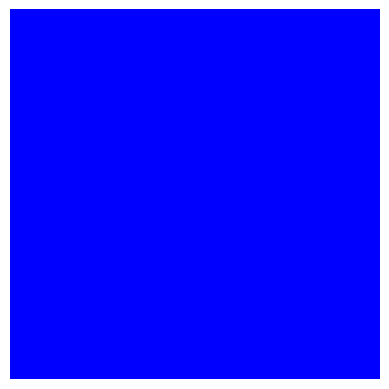

Color resultante después de la evolución: [0, 0, 255]


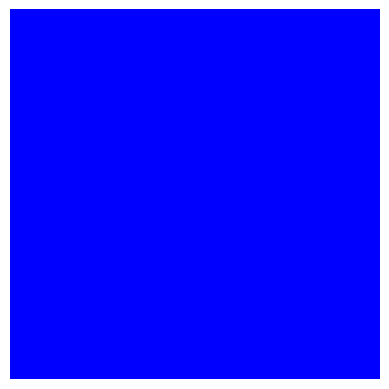

Número de generaciones: 928


In [144]:
import matplotlib.pyplot as plt

# Función para visualizar el color
def plot_color(color):
    plt.imshow([[color]], interpolation='nearest')
    plt.axis('off')
    plt.show()

# Definir parámetros
target_color = [0, 0, 255]
population_size = 20
mutation_rate = 0.1
max_generations = 1000

# Generar población inicial
population = generate_initial_population(population_size)

# Evolucionar la población y rastrear el progreso
generations = 0
best_color = None
while not has_converged(population, target_color) and generations < max_generations:
    population = evolve_population(population, mutation_rate)
    best_color = min(population, key=lambda x: euclidean_distance(x, target_color))
    generations += 1
    print(f"Generación {generations}: Color más cercano al objetivo: {best_color}")

# Mostrar el color objetivo
print("Color objetivo:", target_color)
plot_color(target_color)

# Mostrar el color resultante después de la evolución
print("Color resultante después de la evolución:", best_color)
plot_color(best_color)

# Mostrar el número de generaciones necesarias
print("Número de generaciones:", generations)

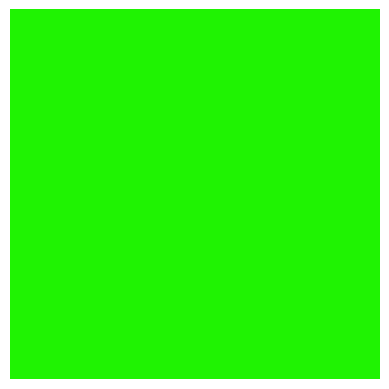

[[31, 243, 2], [86, 250, 113], [3, 154, 236], [72, 155, 75], [26, 150, 221], [73, 5, 103], [197, 143, 60], [211, 93, 183], [178, 107, 14], [9, 43, 204], [48, 17, 134], [34, 101, 169], [13, 156, 169], [180, 68, 59], [88, 246, 7], [19, 213, 55], [145, 199, 35], [114, 35, 184], [125, 117, 200], [189, 196, 43]]
10000
Color final: [10, 39, 234]


In [156]:
import tkinter as tk
import matplotlib.pyplot as plt

# Función para visualizar el color
def plot_color(color):
    plt.imshow([[color]], interpolation='nearest')
    plt.axis('off')
    plt.show()

# Función para actualizar el color de fondo de la ventana
def update_color(color):
    color_hex = "#{:02x}{:02x}{:02x}".format(color[0], color[1], color[2])
    root.configure(bg=color_hex)

# Función para actualizar la interfaz gráfica con la evolución del algoritmo genético
def update_interface(population, target_color, max_generations):
    generations = 0
    best_color = None
    while not has_converged(population, target_color) and generations < max_generations:
        population = evolve_population(population)
        best_color = min(population, key=lambda x: euclidean_distance(x, target_color))
        update_color(best_color)
        generations += 1
        root.update_idletasks()  # Actualizar la interfaz gráfica
    print(generations)
    print("Color final:", best_color)
    

# Parámetros
target_color = [0, 0, 255]
population_size = 20
mutation_rate = 0.8
max_generations = 10000

# Crear ventana
root = tk.Tk()
root.title("Algoritmo Genético")


# Inicializar la población y actualizar la interfaz gráfica
initial_population = generate_initial_population(population_size)
plot_color(initial_population[0])
print(initial_population)
update_interface(initial_population, target_color, max_generations)

# Mostrar ventana
root.mainloop()



In [114]:
import numpy as np
import cv2
import tkinter as tk
from PIL import Image, ImageTk

# Función para crear una imagen del gato
def crear_imagen_gato():
    # Crear una imagen blanca
    height, width = 100, 120
    image = np.ones((height, width, 3), dtype=np.uint8) * 255  # Fondo blanco

    # Dibujar la cabeza del gato (naranja)
    cv2.ellipse(image, (70, 50), (30, 20), 0, 0, 360, (255, 165, 0), -1)  # Color naranja (BGR)

    # Dibujar los ojos (negro)
    cv2.circle(image, (55, 45), 5, (0, 0, 0), -1)  # Color negro (BGR)
    cv2.circle(image, (85, 45), 5, (0, 0, 0), -1)  # Color negro (BGR)

    # Dibujar la nariz (negro)
    cv2.ellipse(image, (70, 55), (5, 3), 0, 0, 360, (0, 0, 0), -1)  # Color negro (BGR)

    # Dibujar las orejas (naranja)
    ear_left = np.array([[50, 30], [60, 20], [70, 30]])
    ear_right = np.array([[90, 30], [80, 20], [70, 30]])
    cv2.fillPoly(image, [ear_left], (255, 165, 0))  # Color naranja (BGR)
    cv2.fillPoly(image, [ear_right], (255, 165, 0))  # Color naranja (BGR)

    return image

# Crear la ventana de la interfaz
root = tk.Tk()
root.title("Gatos!")

# Crear un lienzo para colocar las imágenes
canvas = tk.Canvas(root, width=1000, height=1200)
canvas.pack()

# Lista para almacenar las imágenes y evitar que Python las elimine
imagenes = []

# Coordenadas iniciales para la primera imagen
x, y = 110, 50

# Crear 10 imágenes de gatos y colocarlas en el lienzo
for i in range(10):
    image = crear_imagen_gato()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
    image = Image.fromarray(image)
    photo = ImageTk.PhotoImage(image)

    imagenes.append(photo)  # Agregar la imagen a la lista para mantener la referencia

    canvas.create_image(x, y, image=photo)

    # Ajustar las coordenadas para la próxima imagen
    x += 100  # Aumentar la coordenada y para separar las imágenes
    if(x >=800):
        x = 300
        y+=150

root.mainloop()


In [124]:
import numpy as np
import cv2
import tkinter as tk
from PIL import Image, ImageTk
import random

# Función para generar un color aleatorio en el rango RGB
def generate_random_color():
    return [random.randint(0, 255) for _ in range(3)]

# Función para crear una imagen del gato con un color dado
def crear_imagen_gato(color):
    # Crear una imagen del gato con el color dado
    height, width = 100, 120
    image = np.ones((height, width, 3), dtype=np.uint8) * 255  # Fondo blanco

    # Dibujar la cabeza del gato
    cv2.ellipse(image, (70, 50), (30, 20), 0, 0, 360, tuple(color), -1)

    # Dibujar los ojos
    cv2.circle(image, (55, 45), 5, (0, 0, 0), -1)
    cv2.circle(image, (85, 45), 5, (0, 0, 0), -1)

    # Dibujar la nariz
    cv2.ellipse(image, (70, 55), (5, 3), 0, 0, 360, (0, 0, 0), -1)

    # Dibujar las orejas
    ear_left = np.array([[50, 30], [60, 20], [70, 30]])
    ear_right = np.array([[90, 30], [80, 20], [70, 30]])
    cv2.fillPoly(image, [ear_left], tuple(color))
    cv2.fillPoly(image, [ear_right], tuple(color))

    return image

# Función para calcular la distancia euclidiana entre dos colores en el espacio RGB
def euclidean_distance(color1, color2):
    return np.linalg.norm(np.array(color1) - np.array(color2))

# Función para seleccionar aleatoriamente un individuo de la población
def select_random_individual(population):
    return random.choice(population)

# Función para evolucionar la población durante una generación
def evolve_population(population, target_color, mutation_rate=0.1):
    new_population = []
    while len(new_population) < len(population):
        parent1 = select_random_individual(population)
        parent2 = select_random_individual(population)
        child = single_point_crossover(parent1, parent2)
        child = mutation(child, mutation_rate)
        new_population.append(child)
    return new_population

# Función de cruce (crossover) de un punto
def single_point_crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

# Función de mutación
def mutation(individual, mutation_rate=0.1):
    mutated_individual = individual[:]
    if random.random() < mutation_rate:
        mutation_index = random.randint(0, len(individual) - 1)
        mutated_individual[mutation_index] = random.randint(0, 255)
    return mutated_individual

# Función para actualizar el color de un gato en la interfaz gráfica
def update_cat_color(canvas, cat_index, new_color):
    global imagenes
    global cat_photos

    # Crear una nueva imagen del gato con el nuevo color
    image = crear_imagen_gato(new_color)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    photo = ImageTk.PhotoImage(image)

    # Actualizar la lista de fotos y la imagen del gato en el lienzo
    imagenes[cat_index] = photo
    canvas.itemconfig(cat_photos[cat_index], image=photo)

# Función para evolucionar el color de los gatos en la interfaz gráfica
def evolve_cat_colors(canvas, target_color, population_size=10, mutation_rate=0.1, max_generations=100):
    global imagenes

    # Inicializar la población de colores para los gatos
    population = [generate_random_color() for _ in range(population_size)]

    # Evolucionar la población y actualizar los colores de los gatos en la interfaz gráfica
    generations = 0
    while generations < max_generations:
        # Seleccionar el mejor color de la población actual
        best_color = min(population, key=lambda x: euclidean_distance(x, target_color))

        # Actualizar los colores de los gatos en la interfaz gráfica
        for i, color in enumerate(population):
            update_cat_color(canvas, i, color)

        # Evolucionar la población hacia el color objetivo
        if euclidean_distance(best_color, target_color) == 0:
            break
        else:
            population = evolve_population(population, target_color, mutation_rate)
            generations += 1

# Crear la ventana de la interfaz
root = tk.Tk()
root.title("Gatos!")

# Crear un lienzo para colocar las imágenes de los gatos
canvas = tk.Canvas(root, width=1000, height=1200)
canvas.pack()

# Lista para almacenar las imágenes y evitar que Python las elimine
imagenes = []

# Lista para almacenar los objetos PhotoImage de los gatos
cat_photos = []

# Coordenadas iniciales para la primera imagen de gato
x, y = 110, 50

# Crear 10 imágenes de gatos y colocarlas en el lienzo
for i in range(10):
    # Crear una imagen de gato inicial con un color aleatorio
    color = generate_random_color()
    image = crear_imagen_gato(color)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    photo = ImageTk.PhotoImage(image)

    # Agregar la imagen a la lista para mantener la referencia
    imagenes.append(photo)

    # Colocar la imagen en el lienzo y almacenar el objeto PhotoImage
    cat_photo = canvas.create_image(x, y, image=photo)
    cat_photos.append(cat_photo)

    # Ajustar las coordenadas para la próxima imagen
    x += 100  # Aumentar la coordenada y para separar las imágenes
    if x >= 800:
        x = 300
        y += 150

# Color objetivo al que queremos que evolucionen los gatos
target_color = [0, 0, 255]

# Evolucionar los colores de los gatos hacia el color objetivo
evolve_cat_colors(canvas, target_color)

# Mostrar ventana
root.mainloop()


In [159]:
import numpy as np
import cv2
import tkinter as tk
from PIL import Image, ImageTk
import random

# Función para generar un color aleatorio en el rango RGB
def generate_random_color():
    return [random.randint(0, 255) for _ in range(3)]

# Función para crear una imagen del gato con un color dado
def crear_imagen_gato(color):
    # Crear una imagen del gato con el color dado
    height, width = 100, 120
    image = np.ones((height, width, 3), dtype=np.uint8) * 255  # Fondo blanco

    # Dibujar la cabeza del gato
    cv2.ellipse(image, (70, 50), (30, 20), 0, 0, 360, tuple(color), -1)

    # Dibujar los ojos
    cv2.circle(image, (55, 45), 5, (0, 0, 0), -1)
    cv2.circle(image, (85, 45), 5, (0, 0, 0), -1)

    # Dibujar la nariz
    cv2.ellipse(image, (70, 55), (5, 3), 0, 0, 360, (0, 0, 0), -1)

    # Dibujar las orejas
    ear_left = np.array([[50, 30], [60, 20], [70, 30]])
    ear_right = np.array([[90, 30], [80, 20], [70, 30]])
    cv2.fillPoly(image, [ear_left], tuple(color))
    cv2.fillPoly(image, [ear_right], tuple(color))

    return image

# Función para calcular la distancia euclidiana entre dos colores en el espacio RGB
def euclidean_distance(color1, color2):
    return np.linalg.norm(np.array(color1) - np.array(color2))

# Función para seleccionar aleatoriamente un individuo de la población
def select_random_individual(population):
    return random.choice(population)

# Función para evolucionar la población durante una generación
def evolve_population(population, target_color, mutation_rate=0.1):
    new_population = []
    while len(new_population) < len(population):
        parent1 = select_random_individual(population)
        parent2 = select_random_individual(population)
        child = single_point_crossover(parent1, parent2)
        child = mutation(child, mutation_rate)
        new_population.append(child)
    return new_population

# Función de cruce (crossover) de un punto
def single_point_crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1) - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

# Función de mutación
def mutation(individual, mutation_rate=0.1):
    mutated_individual = individual[:]
    if random.random() < mutation_rate:
        mutation_index = random.randint(0, len(individual) - 1)
        mutated_individual[mutation_index] = random.randint(0, 255)
    return mutated_individual

# Función para actualizar el color de un gato en la interfaz gráfica
def update_cat_color(canvas, cat_index, new_color):
    global imagenes
    global cat_photos

    # Crear una nueva imagen del gato con el nuevo color
    image = crear_imagen_gato(new_color)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    photo = ImageTk.PhotoImage(image)

    # Actualizar la lista de fotos y la imagen del gato en el lienzo
    imagenes[cat_index] = photo
    canvas.itemconfig(cat_photos[cat_index], image=photo)

# Función para evolucionar el color de los gatos en la interfaz gráfica en tiempo real
def evolve_cat_colors(canvas, target_color, population_size=10, mutation_rate=0.9, max_generations=1000):
    global imagenes

    # Inicializar la población de colores para los gatos
    population = [generate_random_color() for _ in range(population_size)]

    # Evolucionar la población y actualizar los colores de los gatos en la interfaz gráfica en tiempo real
    generations = 0
    while generations < max_generations:
        # Seleccionar el mejor color de la población actual
        best_color = min(population, key=lambda x: euclidean_distance(x, target_color))

        # Actualizar los colores de los gatos en la interfaz gráfica en tiempo real
        for i, color in enumerate(population):
            update_cat_color(canvas, i, color)
            canvas.update()  # Actualizar la interfaz gráfica en cada generación

        # Evolucionar la población hacia el color objetivo
        if euclidean_distance(best_color, target_color) == 0:
            break
        else:
            population = evolve_population(population, target_color, mutation_rate)
            generations += 1

# Crear la ventana de la interfaz
root = tk.Tk()
root.title("Gatos!")

# Crear un lienzo para colocar las imágenes de los gatos
canvas = tk.Canvas(root, width=1000, height=1200)
canvas.pack()

# Lista para almacenar las imágenes y evitar que Python las elimine
imagenes = []

# Lista para almacenar los objetos PhotoImage de los gatos
cat_photos = []

# Coordenadas iniciales para la primera imagen de gato
x, y = 110, 50

# Crear 10 imágenes de gatos y colocarlas en el lienzo
for i in range(10):
    # Crear una imagen de gato inicial con un color aleatorio
    color = generate_random_color()
    image = crear_imagen_gato(color)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    photo = ImageTk.PhotoImage(image)

    # Agregar la imagen a la lista para mantener la referencia
    imagenes.append(photo)

    # Colocar la imagen en el lienzo y almacenar el objeto PhotoImage
    cat_photo = canvas.create_image(x, y, image=photo)
    cat_photos.append(cat_photo)

    # Ajustar las coordenadas para la próxima imagen
    x += 100  # Aumentar la coordenada y para separar las imágenes
    if x >= 800:
        x = 300
        y += 150

# Color objetivo al que queremos que evolucionen los gatos
target_color = [0, 0, 255]

# Evolucionar los colores de los gatos hacia el color objetivo en tiempo real
evolve_cat_colors(canvas, target_color)

# Mostrar ventana
root.mainloop()


In [163]:
import numpy as np
import cv2
import tkinter as tk
from PIL import Image, ImageTk

# Función para crear una imagen del gato con un color específico
def crear_imagen_gato(color,size):
    # Crear una imagen blanca
    height, width = size.shape
    image = np.ones((height, width, 3), dtype=np.uint8) * 255  # Fondo blanco

    # Dibujar la cabeza del gato (naranja)
    cv2.ellipse(image, (70, 50), (30, 20), 0, 0, 360, tuple(color), -1)  # Color naranja (BGR)

    # Dibujar los ojos (negro)
    cv2.circle(image, (55, 45), 5, (0, 0, 0), -1)  # Color negro (BGR)
    cv2.circle(image, (85, 45), 5, (0, 0, 0), -1)  # Color negro (BGR)

    # Dibujar la nariz (negro)
    cv2.ellipse(image, (70, 55), (5, 3), 0, 0, 360, tuple(color), -1)  # Color negro (BGR)

    # Dibujar las orejas (naranja)
    ear_left = np.array([[50, 30], [60, 20], [70, 30]])
    ear_right = np.array([[90, 30], [80, 20], [70, 30]])
    cv2.fillPoly(image, [ear_left],  tuple(color))  # Color naranja (BGR)
    cv2.fillPoly(image, [ear_right],  tuple(color))  # Color naranja (BGR)

    return image

# Función para generar una población inicial de colores aleatorios para los gatos
def generate_initial_population(size):
    return [np.random.randint(0, 256, (1, 1, 3), dtype=np.uint8) for _ in range(size)]

# Función para evolucionar los colores de los gatos hacia un color objetivo en tiempo real
def evolve_cat_colors(canvas, target_color, population):
    # Lógica de evolución de colores
    pass  # Aquí iría tu lógica de evolución de colores

# Crear la ventana de la interfaz
root = tk.Tk()
root.title("Gatos!")

# Crear un lienzo para colocar las imágenes de los gatos
canvas = tk.Canvas(root, width=1000, height=1200)
canvas.pack()

# Lista para almacenar los objetos PhotoImage de los gatos
cat_photos = []

# Coordenadas iniciales para la primera imagen de gato
x, y = 110, 50

# Parámetros
target_color = [0, 255, 0]
population_size = 10
mutation_rate = 0.8
max_generations = 10000
population = generate_initial_population(population_size)

# Crear 10 imágenes de gatos y colocarlas en el lienzo
for i, color in enumerate(population):
    # Crear una imagen de gato inicial con un color aleatorio
    image = crear_imagen_gato(color)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    photo = ImageTk.PhotoImage(image)

    # Colocar la imagen en el lienzo y almacenar el objeto PhotoImage
    cat_photo = canvas.create_image(x, y, image=photo)
    cat_photos.append(cat_photo)

    # Ajustar las coordenadas para la próxima imagen
    x += 100  # Aumentar la coordenada y para separar las imágenes
    if x >= 800:
        x = 300
        y += 150

# Color objetivo al que queremos que evolucionen los gatos
target_color = [0, 0, 255]

# Evolucionar los colores de los gatos hacia el color objetivo en tiempo real
evolve_cat_colors(canvas, target_color, population)

# Mostrar ventana
root.mainloop()


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'ellipse'
> Overload resolution failed:
>  - Scalar value for argument 'color' is not numeric
>  - Scalar value for argument 'color' is not numeric
>  - ellipse() takes at most 5 arguments (8 given)
>  - ellipse() takes at most 5 arguments (8 given)


In [166]:
size = (300,200)
B, A = tuple(size)
print(A)
print(B)

200
300
